## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [2]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import *
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

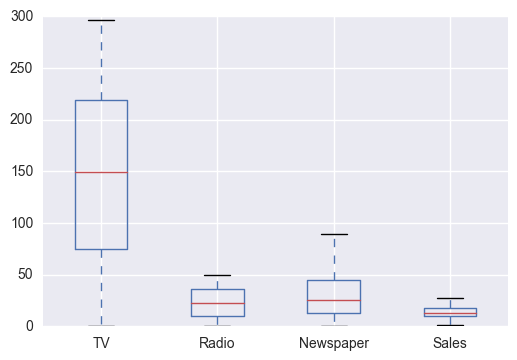

In [23]:
df.boxplot(return_type='axes')
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

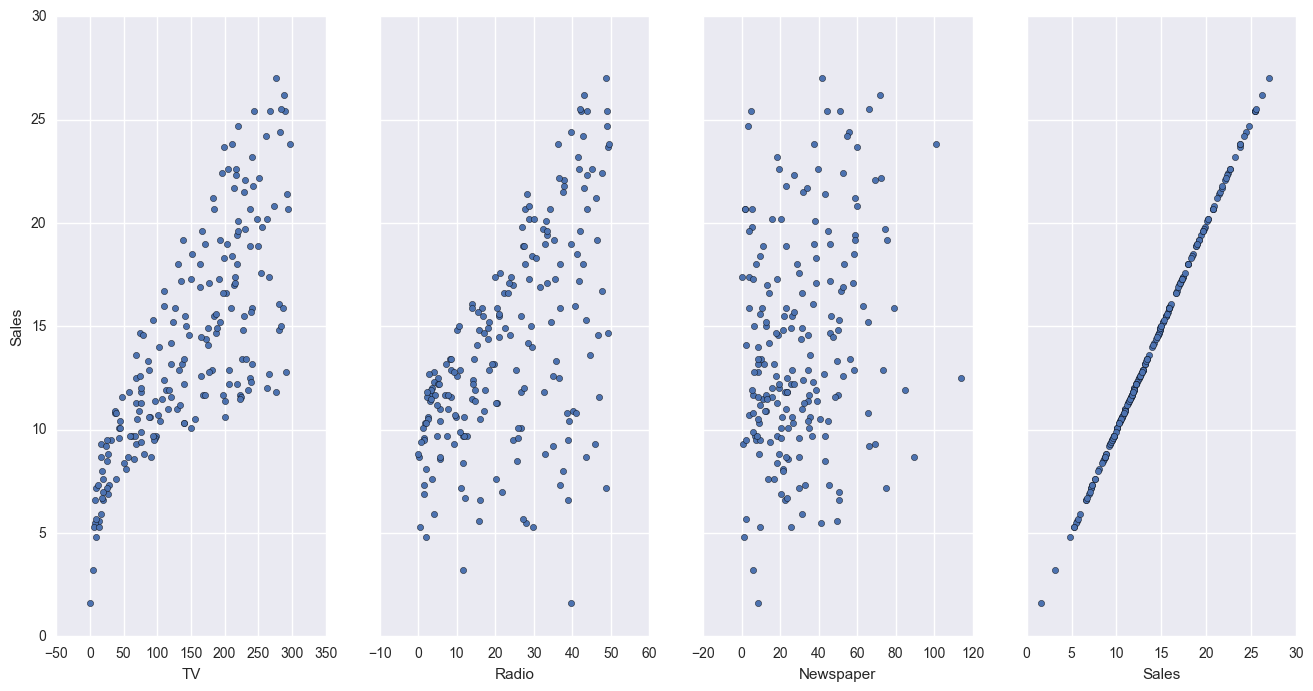

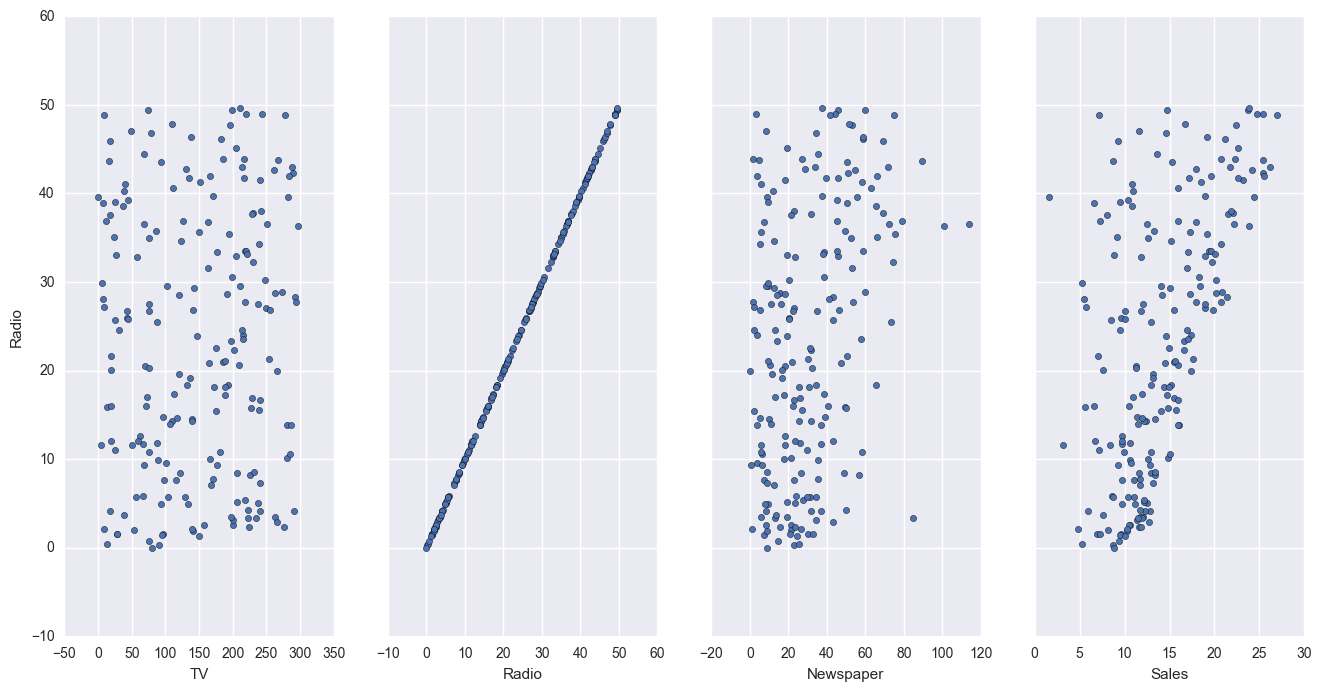

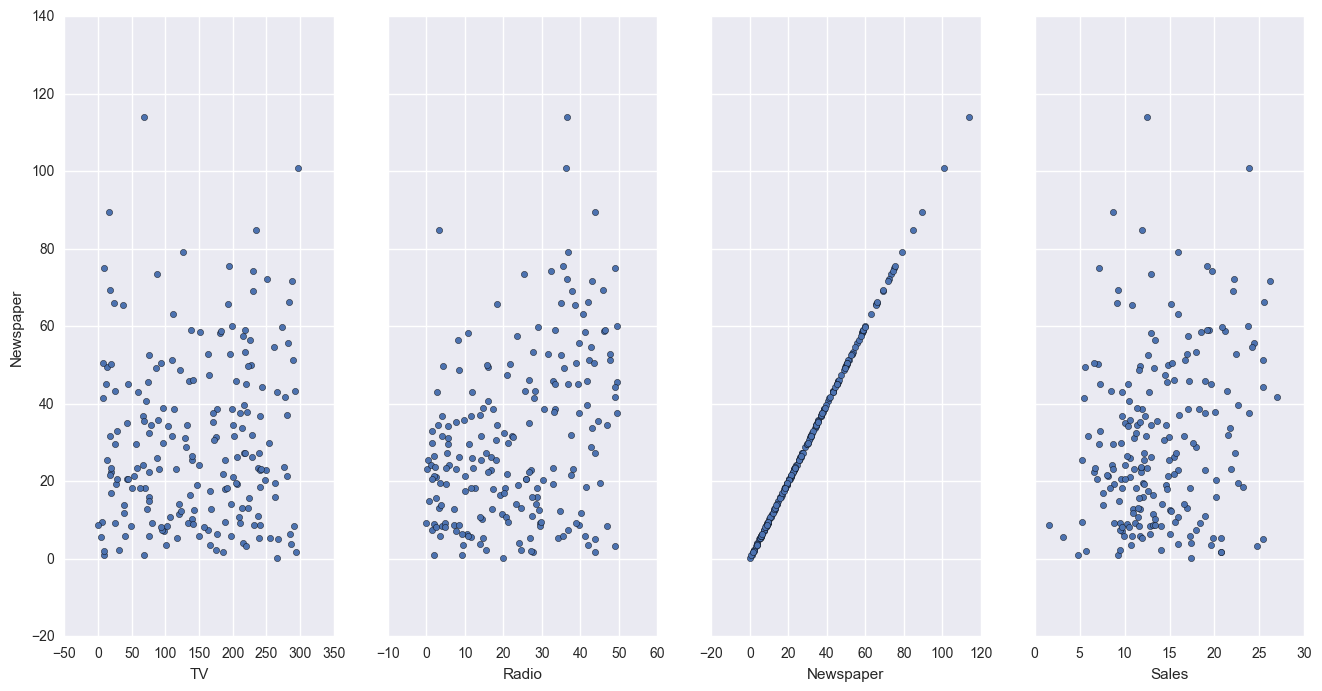

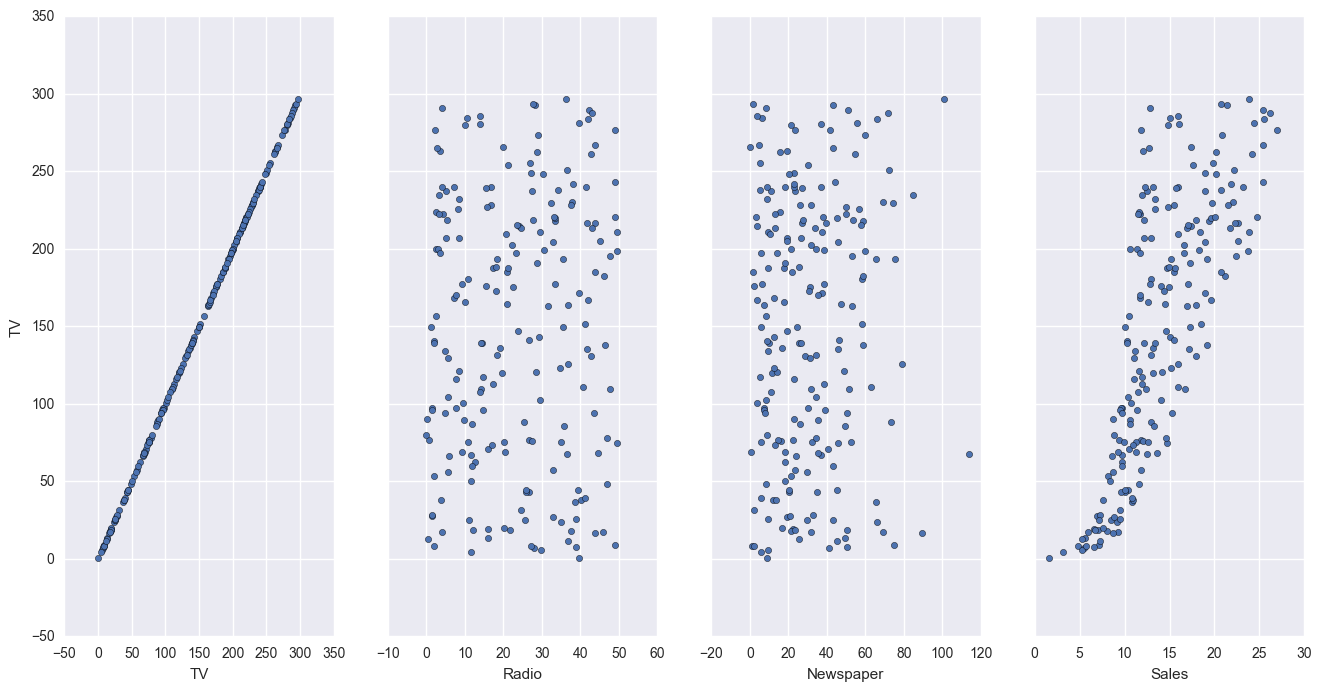

In [208]:
from pandas.tools.plotting import scatter_matrix 
fig, axs = plt.subplots(1, 4, sharey=True)
df.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
df.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])
df.plot(kind='scatter', x='Sales', y='Sales', ax=axs[3])

fig, axs = plt.subplots(1, 4, sharey=True)
df.plot(kind='scatter', x='TV', y='Radio', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Radio', y='Radio', ax=axs[1])
df.plot(kind='scatter', x='Newspaper', y='Radio', ax=axs[2])
df.plot(kind='scatter', x='Sales', y='Radio', ax=axs[3])

fig, axs = plt.subplots(1, 4, sharey=True)
df.plot(kind='scatter', x='TV', y='Newspaper', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Radio', y='Newspaper', ax=axs[1])
df.plot(kind='scatter', x='Newspaper', y='Newspaper', ax=axs[2])
df.plot(kind='scatter', x='Sales', y='Newspaper', ax=axs[3])

fig, axs = plt.subplots(1, 4, sharey=True)
df.plot(kind='scatter', x='TV', y='TV', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Radio', y='TV', ax=axs[1])
df.plot(kind='scatter', x='Newspaper', y='TV', ax=axs[2])
df.plot(kind='scatter', x='Sales', y='TV', ax=axs[3])

In [35]:
from pandas.tools.plotting import scatter_matrix 



Which of the variables seem correlated with one another? Which don't? Explain your answer

The Sales variable seems to have a positive correlation with TV advertising dollars, and a weakly positive correlation with the Radio advertising dollars. There is not much indication of correlation in the other plots. We can assess whether there is a linear correlation of some sort depending on if there is a linear form of some sort noticable in the scatter plots. 


### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [190]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [191]:
Y = df['Sales']

b) Set X to be just the features described above in df

In [192]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = df[feature_cols]
#X = df.loc[:,['TV', 'Radio', 'Newspaper']]

print ("Feature space holds %d observations and %d features" % (X.shape))

Feature space holds 200 observations and 3 features


c) Randomly split data into training and testing - 80% training, 20% testing.

In [193]:
size = 200

# Split the data into training/testing sets
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
Y_train = Y[0:int(size*0.8)]
Y_test = Y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [194]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [196]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))


Coefficients: 
 [ 0.0472521   0.179922   -0.00094408]
Residual sum of squares: 2.79
Variance score: 0.90


This is a good model, as indicated by the high variance score.
A variance of 1.0 would be perfect prediction, and so 0.90 is quite high.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

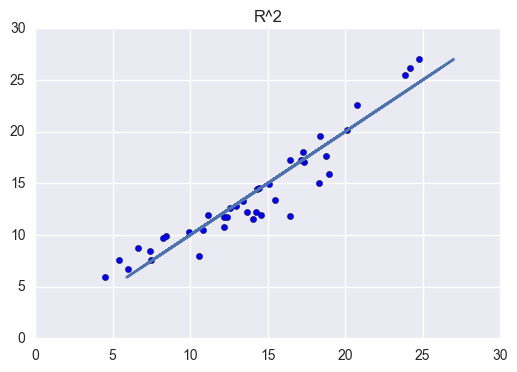

In [197]:
#plt.figure(figsize=(10,10))
plt.title('R^2')
plt.scatter(regr.predict(X_test),Y_test)
plt.plot(Y_test,Y_test)

Yes, this is a good model, as the regression line fits the data points well, showing a strong positive linear correlation.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

Yes, we can check the importance of features by analyzing the coefficients for each variable.
If we wanted to go further, we could also calculate the root mean squared error value. If we wanted to go further, we could check is what would happen to the model if we removed certain variables. For instance, we could check what would happen if we remove the data from Newspaper sales, to see if it provides a more clear data set; one metric to determine this is if the RMSE value decreases when the Newspaper data is removed. 

In [207]:
import statsmodels.formula.api as smf

feature_cols = ['TV', 'Radio', 'Newspaper']

print(regr.coef_)

# make predictions on the testing set
Y_pred = regr.predict(X_test)

#calculate relative error
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


[ 0.0472521   0.179922   -0.00094408]
1.67067207622


In [141]:
zip(feature_cols, regr.coef_)

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

The coefficients calculated above can be interpreted in terms of association. For instance, assuming a constant amount of spending on TV and Newspaper ads, a unit ($1000) increase of Radio sales is associated with a 0.179 unit increase in Sales. Similarly, assuming a constant amount of spending in Radio and Newspaper, a unit increase of TV ads is associated with a 0.0472 increase in Sales. Finally, assuming a constant amount of spending in TV and Radio, a unit increase of Newspaper ads is associated with a 0.000944 decrease in Sales. However, this needs to be checked, because we have already noticed that there is little correlation between Newspaper ads and Sales based on the scatter plots, so there may be a large amount of noise on that. 

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

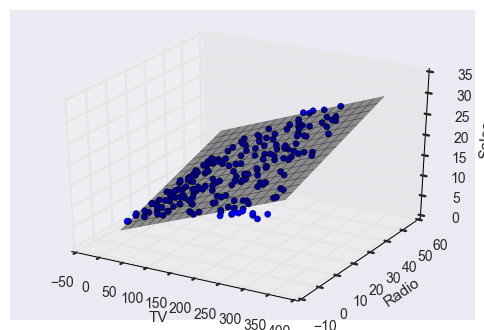

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from matplotlib import cm
%matplotlib inline


model = sm.ols(formula='Sales ~ TV + Radio', data = df)
fit = model.fit()

fit.summary()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(df['TV'], df['Radio'], df['Sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()



It is unclear whether there is another vector of importance. However, for the sake of the extercise, I will test out whether adding another variable to test the market size would be useful. 

In [8]:
#testing for a new variable: whether the market size is large or not
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# initiate a Series of booleans in which roughly half are True
nums = np.random.rand(len(df))
mask_big = nums > 0.5

# initially set Size to small, then change roughly half to be large
df['Size'] = 'small'
df.loc[mask_big, 'Size'] = 'big'

# create a new Series called IsBigMarket
df['IsBigMarket'] = df.Size.map({'small':0, 'big':1})
df.head()

,TV,Radio,Newspaper,Sales,Size,IsBigMarket
1,230.1,37.8,69.2,22.1,big,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,big,1


In [123]:
# redoing linear regression with additional variable
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsBigMarket']
X = df[feature_cols]
Y = df['Sales']

# Create linear regression object
regr_new = LinearRegression()

# Train the model using the training sets
regr_new.fit(X, Y)

# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.04571982  0.18872814 -0.00109768  0.05742385]


The new variable testing for a large market size has corresponding coefficient of 0.057, which indicates that for a given amount of ad spending, advertisement expenditure in a big market has an associated increase of 57.4 items (assuming the sales variable is in 1000s of units). This is in comparison to the baseline level, which here would be taken as a sample small market. Therefore, this additional variable is useful in indicating another important parameter in deciding how to spend advertising funds. 

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


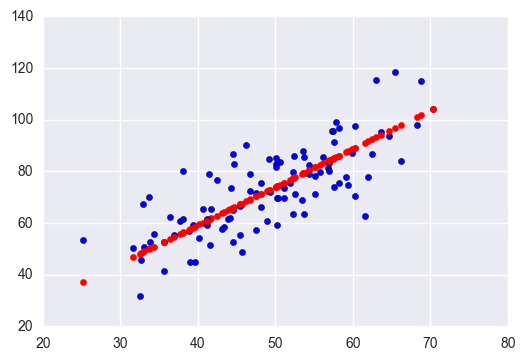

In [10]:
from numpy import *
%matplotlib inline
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
        plt,hold(True)

run(100)


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = -1.3572271776525033e+268, m = -6.905358521879341e+269, error = inf


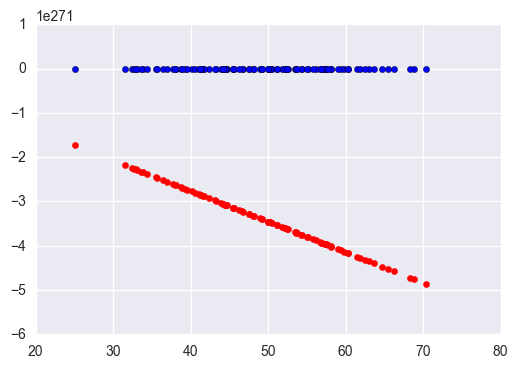

In [11]:
def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.1
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
        plt,hold(True)

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.011490847112648363, m = 0.5815775397751681, error = 2119.9793173686226


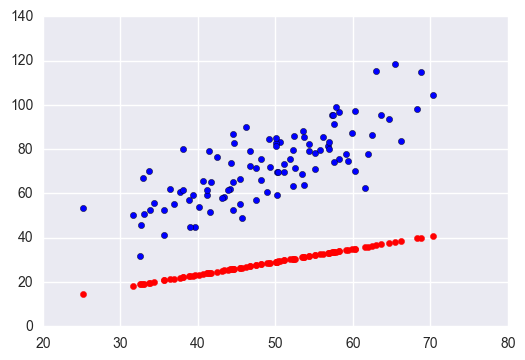

In [27]:
def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.000001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


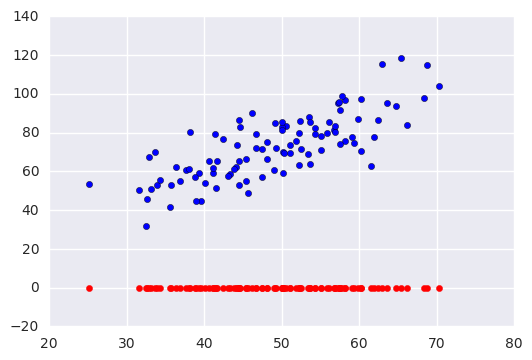

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


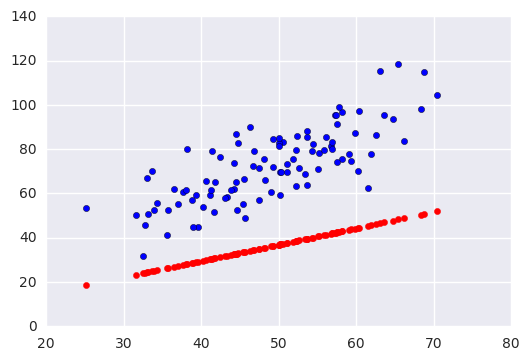

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


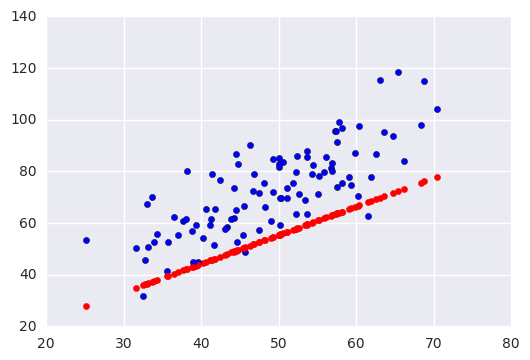

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


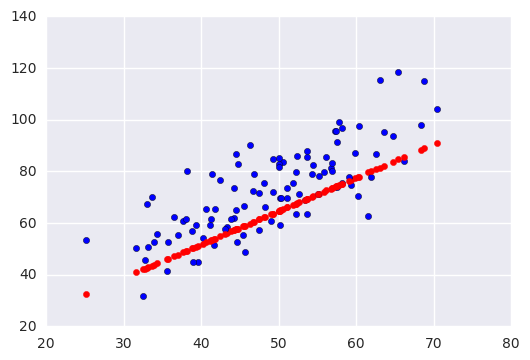

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


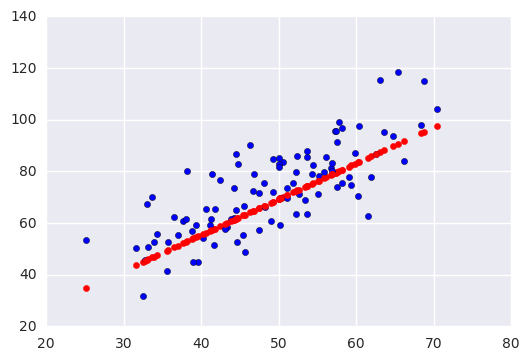

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


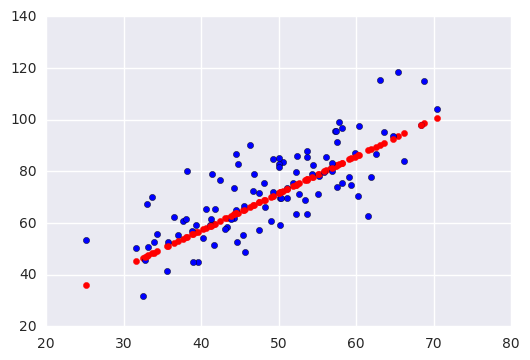

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


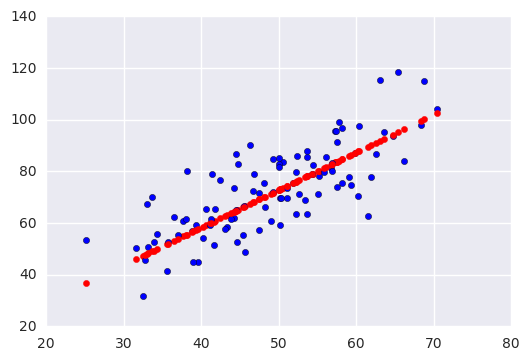

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


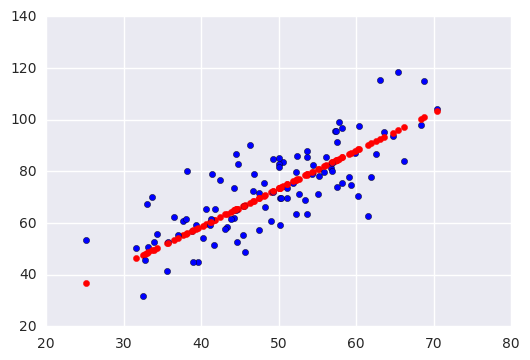

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


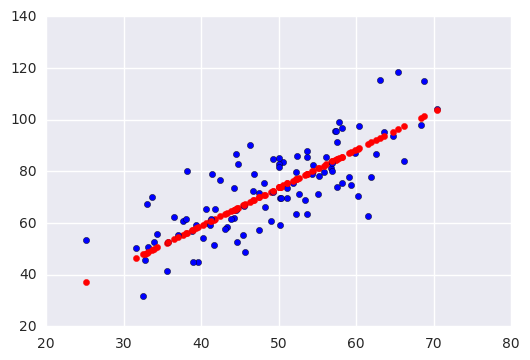

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


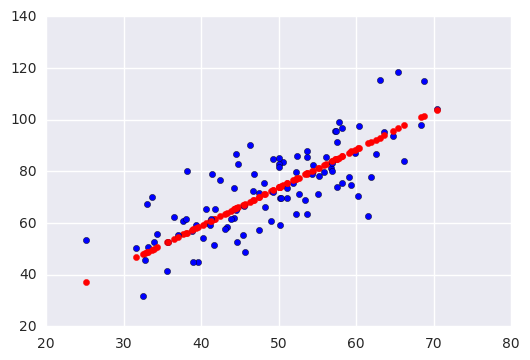

In [23]:
# Use this to visually discuss convergence rate based on learning rate
def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

for num in range(0,10):
    run(num)
    plt.show()


Convergence is related to the learning rate because it determines how fast or slow the gradient descent moves toward the the optimal weights. If the learning curve is too large we will essentially overshoot the optimal solution. Conversely, an inappropriately small learning curve will require more iterations to converge to the best values, and take longer. 

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

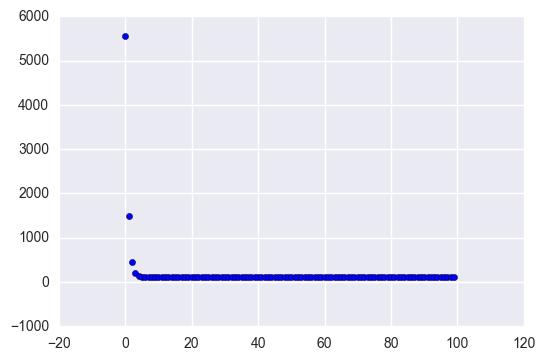

In [99]:
from numpy import *

def run_num_error_iterations(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error = compute_error_for_line_given_points(b, m, points)
   
    plt.scatter(num_iterations,error)
    
for num in range(0,100):
    run_num_error_iterations(num)

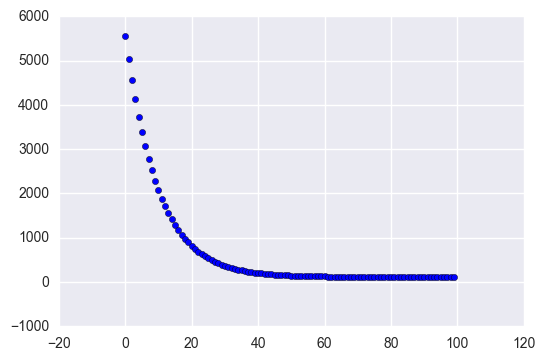

In [104]:
def run_num_error_iterations(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.00001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error = compute_error_for_line_given_points(b, m, points)
   
    plt.scatter(num_iterations,error)
    
for num in range(0,100):
    run_num_error_iterations(num)

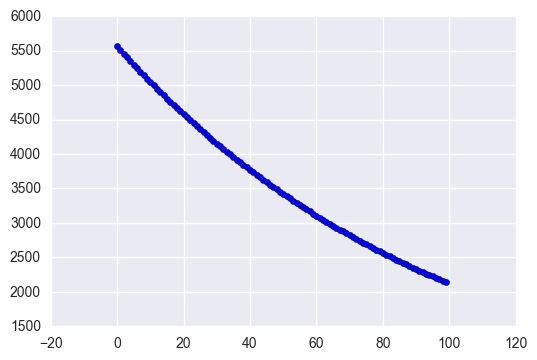

In [105]:
def run_num_error_iterations(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.000001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error = compute_error_for_line_given_points(b, m, points)
   
    plt.scatter(num_iterations,error)
    
for num in range(0,100):
    run_num_error_iterations(num)

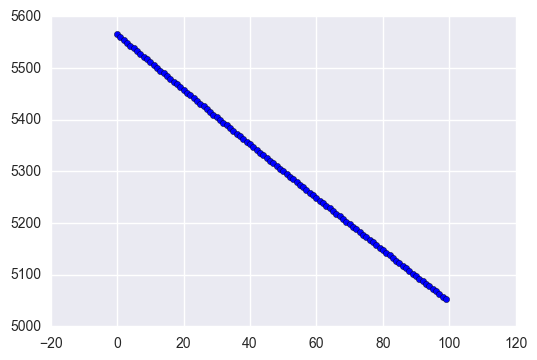

In [106]:
def run_num_error_iterations(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0000001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error = compute_error_for_line_given_points(b, m, points)
   
    plt.scatter(num_iterations,error)
    
for num in range(0,100):
    run_num_error_iterations(num)